### Plotting the design points for all viscous corrections

Compare $v_0(p_T)$ results across different viscous corrections.
Plots all design points for each viscous correction type (Grad, CE, PTM, PTB) in a single centrality.



Loading viscous correction: Grad
--------------------------------------------------------------------------------
✓ Loaded 500 design points

Generating plot...


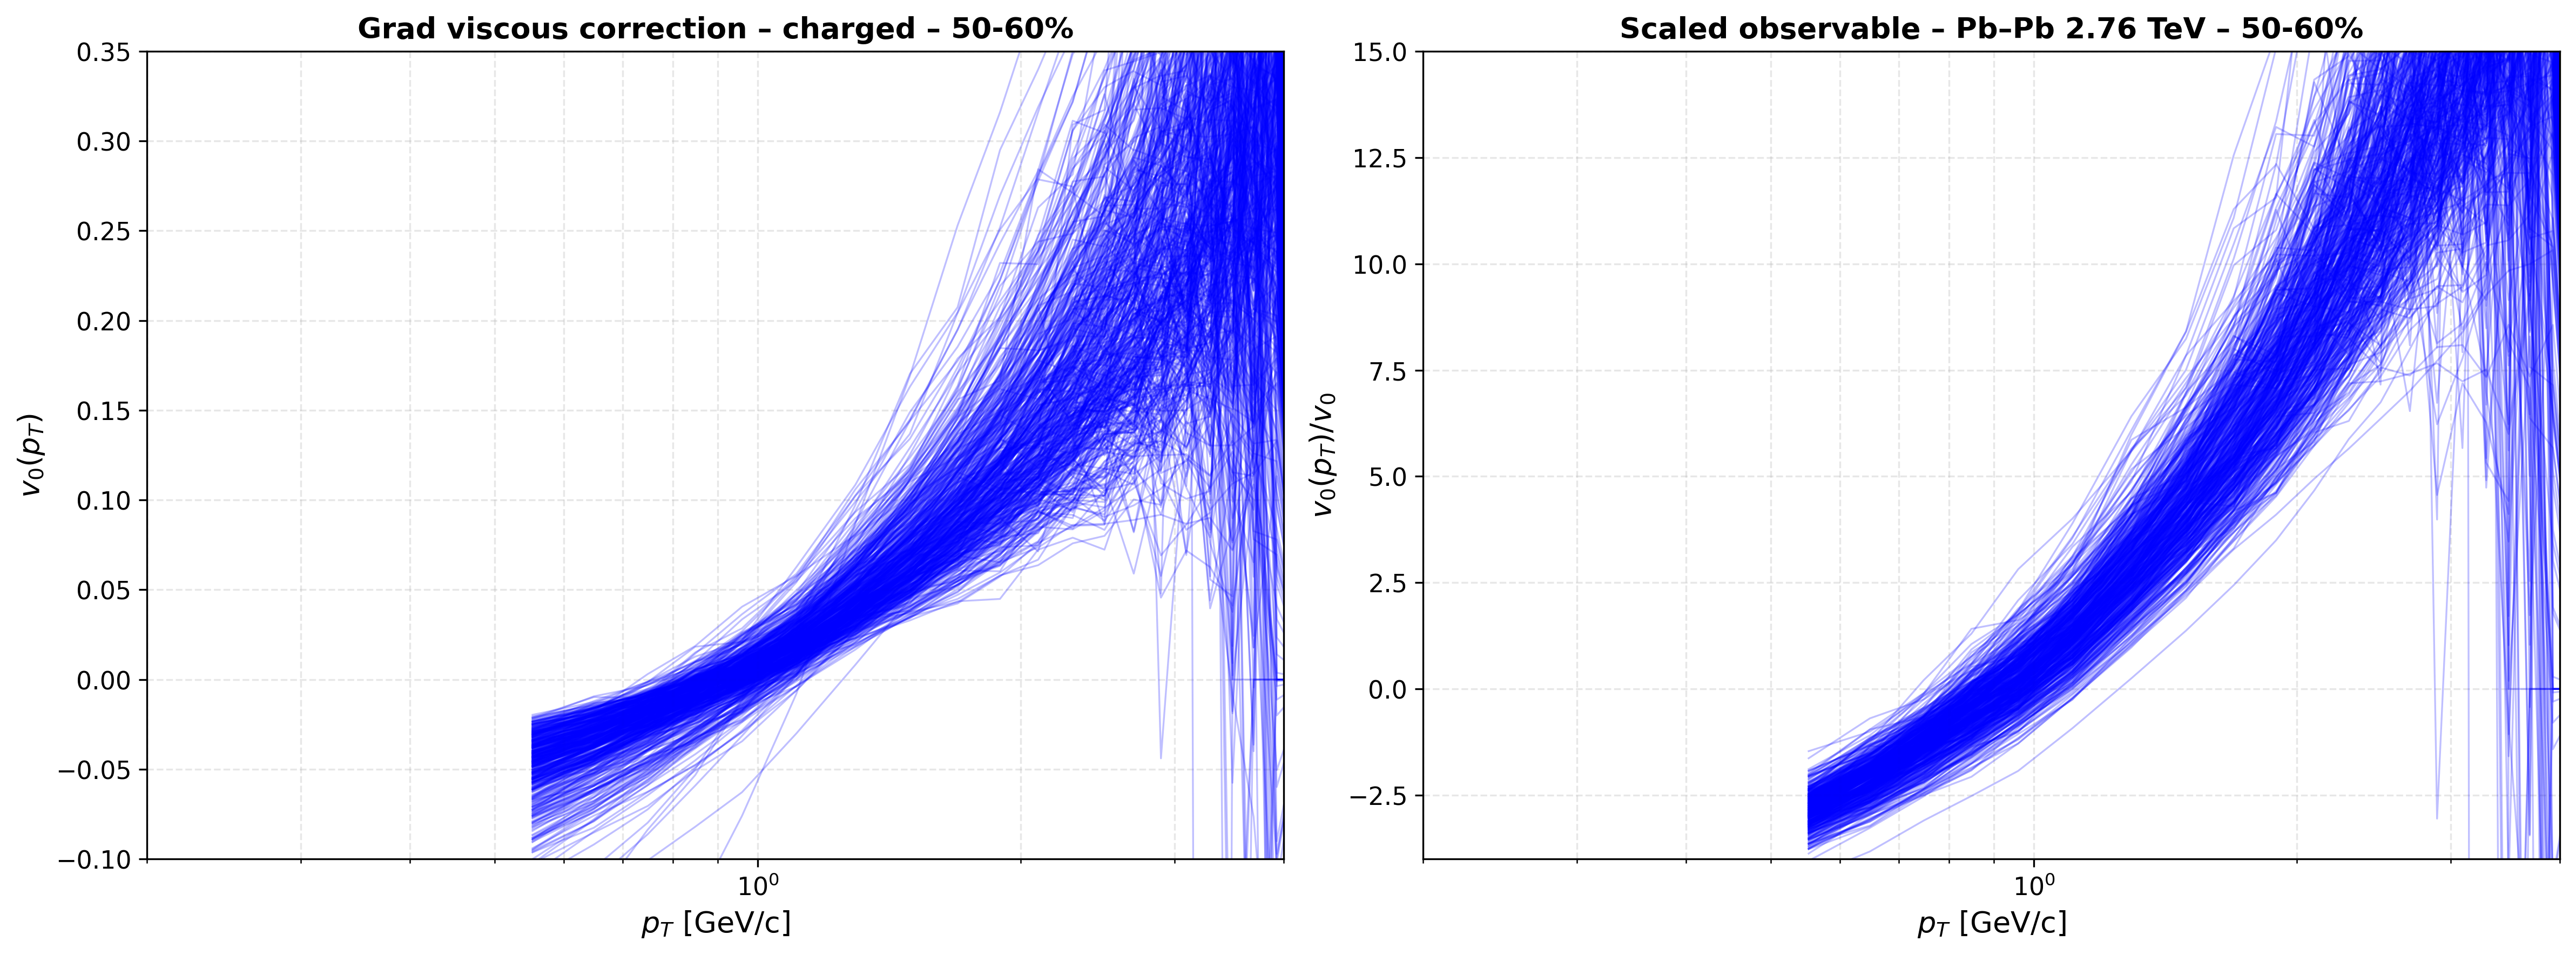


Done!


In [6]:
#!/usr/bin/env python3
"""
Compare v0(pT) results for a SINGLE viscous correction.
Plots all design points for one correction type in a single centrality.
"""
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pathlib import Path

# =============================================================================
# CONFIGURATION
# =============================================================================

# Input files for different viscous corrections
VISCOUS_CORRECTIONS = {
    'Grad': 'design_points_data/differential_radial_flow/v0pt_design_points_results_Pb_Pb_2760_Grad.pkl',
    'CE':   'design_points_data/differential_radial_flow/v0pt_design_points_results_Pb_Pb_2760_CE.pkl',
    'PTM':  'design_points_data/differential_radial_flow/v0pt_design_points_results_Pb_Pb_2760_PTM.pkl',
    'PTB':  'design_points_data/differential_radial_flow/v0pt_design_points_results_Pb_Pb_2760_PTB.pkl'
}

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# SELECT WHICH VISCOUS CORRECTION TO PLOT
# Options: 'Grad', 'CE', 'PTM', 'PTB'
SELECTED_CORRECTION = 'Grad'
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Centrality to plot (index in centbins array)
CENTRALITY_INDEX = 6  # 50-60%
CENTRALITY_LABEL = '50-60%'

# Species to plot
SPECIES = 'charged'  # 'charged', 'pi', 'kaon', 'proton', 'Sigma', 'Xi'

# =============================================================================
# LOAD DATA
# =============================================================================

def load_results(filename):
    """Load pickle file with v0(pT) results"""
    if not Path(filename).exists():
        print(f"Warning: File '{filename}' not found!")
        return None

    with open(filename, 'rb') as f:
        results = pickle.load(f)
    return results


# =============================================================================
# PLOTTING FUNCTIONS (UNCHANGED)
# =============================================================================

def plot_viscous_corrections_comparison(all_data, cent_idx, species_name):
    """
    Create two subplots:
    1. v0(pT) vs pT (log scale)
    2. v0(pT)/v0 vs pT (log scale)
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=300)

    colors = {
        'Grad': 'blue',
        'CE': 'red',
        'PTM': 'magenta',
        'PTB': 'green'
    }

    for correction_name, results in all_data.items():
        if len(results) == 0:
            continue

        color = colors.get(correction_name, 'gray')

        if cent_idx not in results[0]['centrality_data']:
            print(f"Warning: Centrality {CENTRALITY_LABEL} not found in {correction_name}")
            continue

        for result in results:
            cent_data = result['centrality_data'][cent_idx]
            if species_name not in cent_data:
                continue

            sp = cent_data[species_name]
            pT = np.array(sp['pt_centers'])
            v0pt = np.array(sp['v0pT'])
            v0_global = sp['v0_global']
            ratio = v0pt / v0_global if v0_global != 0 else np.zeros_like(v0pt)

            axes[0].plot(pT, v0pt, color=color, alpha=0.25, linewidth=0.8)
            axes[1].plot(pT, ratio, color=color, alpha=0.25, linewidth=0.8)

    for ax in axes:
        ax.set_xscale('log')
        ax.grid(True, alpha=0.3, which='both', linestyle='--')
        ax.tick_params(labelsize=11)
        ax.set_xlim(0.2, 4.0)

    axes[0].set_xlabel(r"$p_T$ [GeV/c]", fontsize=13)
    axes[0].set_ylabel(r"$v_0(p_T)$", fontsize=13)
    axes[0].set_title(
        f"{SELECTED_CORRECTION} viscous correction – {species_name} – {CENTRALITY_LABEL}",
        fontsize=13, fontweight='bold'
    )
    axes[0].set_ylim(-0.1, 0.35)

    axes[1].set_xlabel(r"$p_T$ [GeV/c]", fontsize=13)
    axes[1].set_ylabel(r"$v_0(p_T)/v_0$", fontsize=13)
    axes[1].set_title(
        f"Scaled observable – Pb–Pb 2.76 TeV – {CENTRALITY_LABEL}",
        fontsize=13, fontweight='bold'
    )
    axes[1].set_ylim(-4, 15)

    plt.tight_layout()
    return fig


# =============================================================================
# MAIN EXECUTION
# =============================================================================

if __name__ == "__main__":

    print(f"\nLoading viscous correction: {SELECTED_CORRECTION}")
    print("-" * 80)

    filepath = VISCOUS_CORRECTIONS[SELECTED_CORRECTION]
    results = load_results(filepath)

    if results is None:
        raise RuntimeError("Failed to load selected viscous correction file.")

    all_data = {SELECTED_CORRECTION: results}

    print(f"✓ Loaded {len(results)} design points")

    print("\nGenerating plot...")
    fig = plot_viscous_corrections_comparison(
        all_data,
        CENTRALITY_INDEX,
        SPECIES
    )

    plt.show()
    print("\nDone!")

### Plotting integrated $v_0$ for all viscous corrections and design points

Plot global integrated $v_0$ vs centrality for all viscous corrections.
Creates a 2x2 panel figure comparing Grad, CE, PTM, and PTB.

Loading data for all viscous corrections...
--------------------------------------------------------------------------------
Loading Grad...
  ✓ Loaded 500 design points
Loading CE...
  ✓ Loaded 500 design points
Loading PTM...
  ✓ Loaded 500 design points
Loading PTB...
  ✓ Loaded 500 design points
--------------------------------------------------------------------------------
GLOBAL v0 vs CENTRALITY SUMMARY
Species: charged

--- Grad ---
  Design points: 500
  Centrality bins: 10

--- CE ---
  Design points: 500
  Centrality bins: 10

--- PTM ---
  Design points: 500
  Centrality bins: 10

--- PTB ---
  Design points: 500
  Centrality bins: 10


Generating 2x2 panel plot...


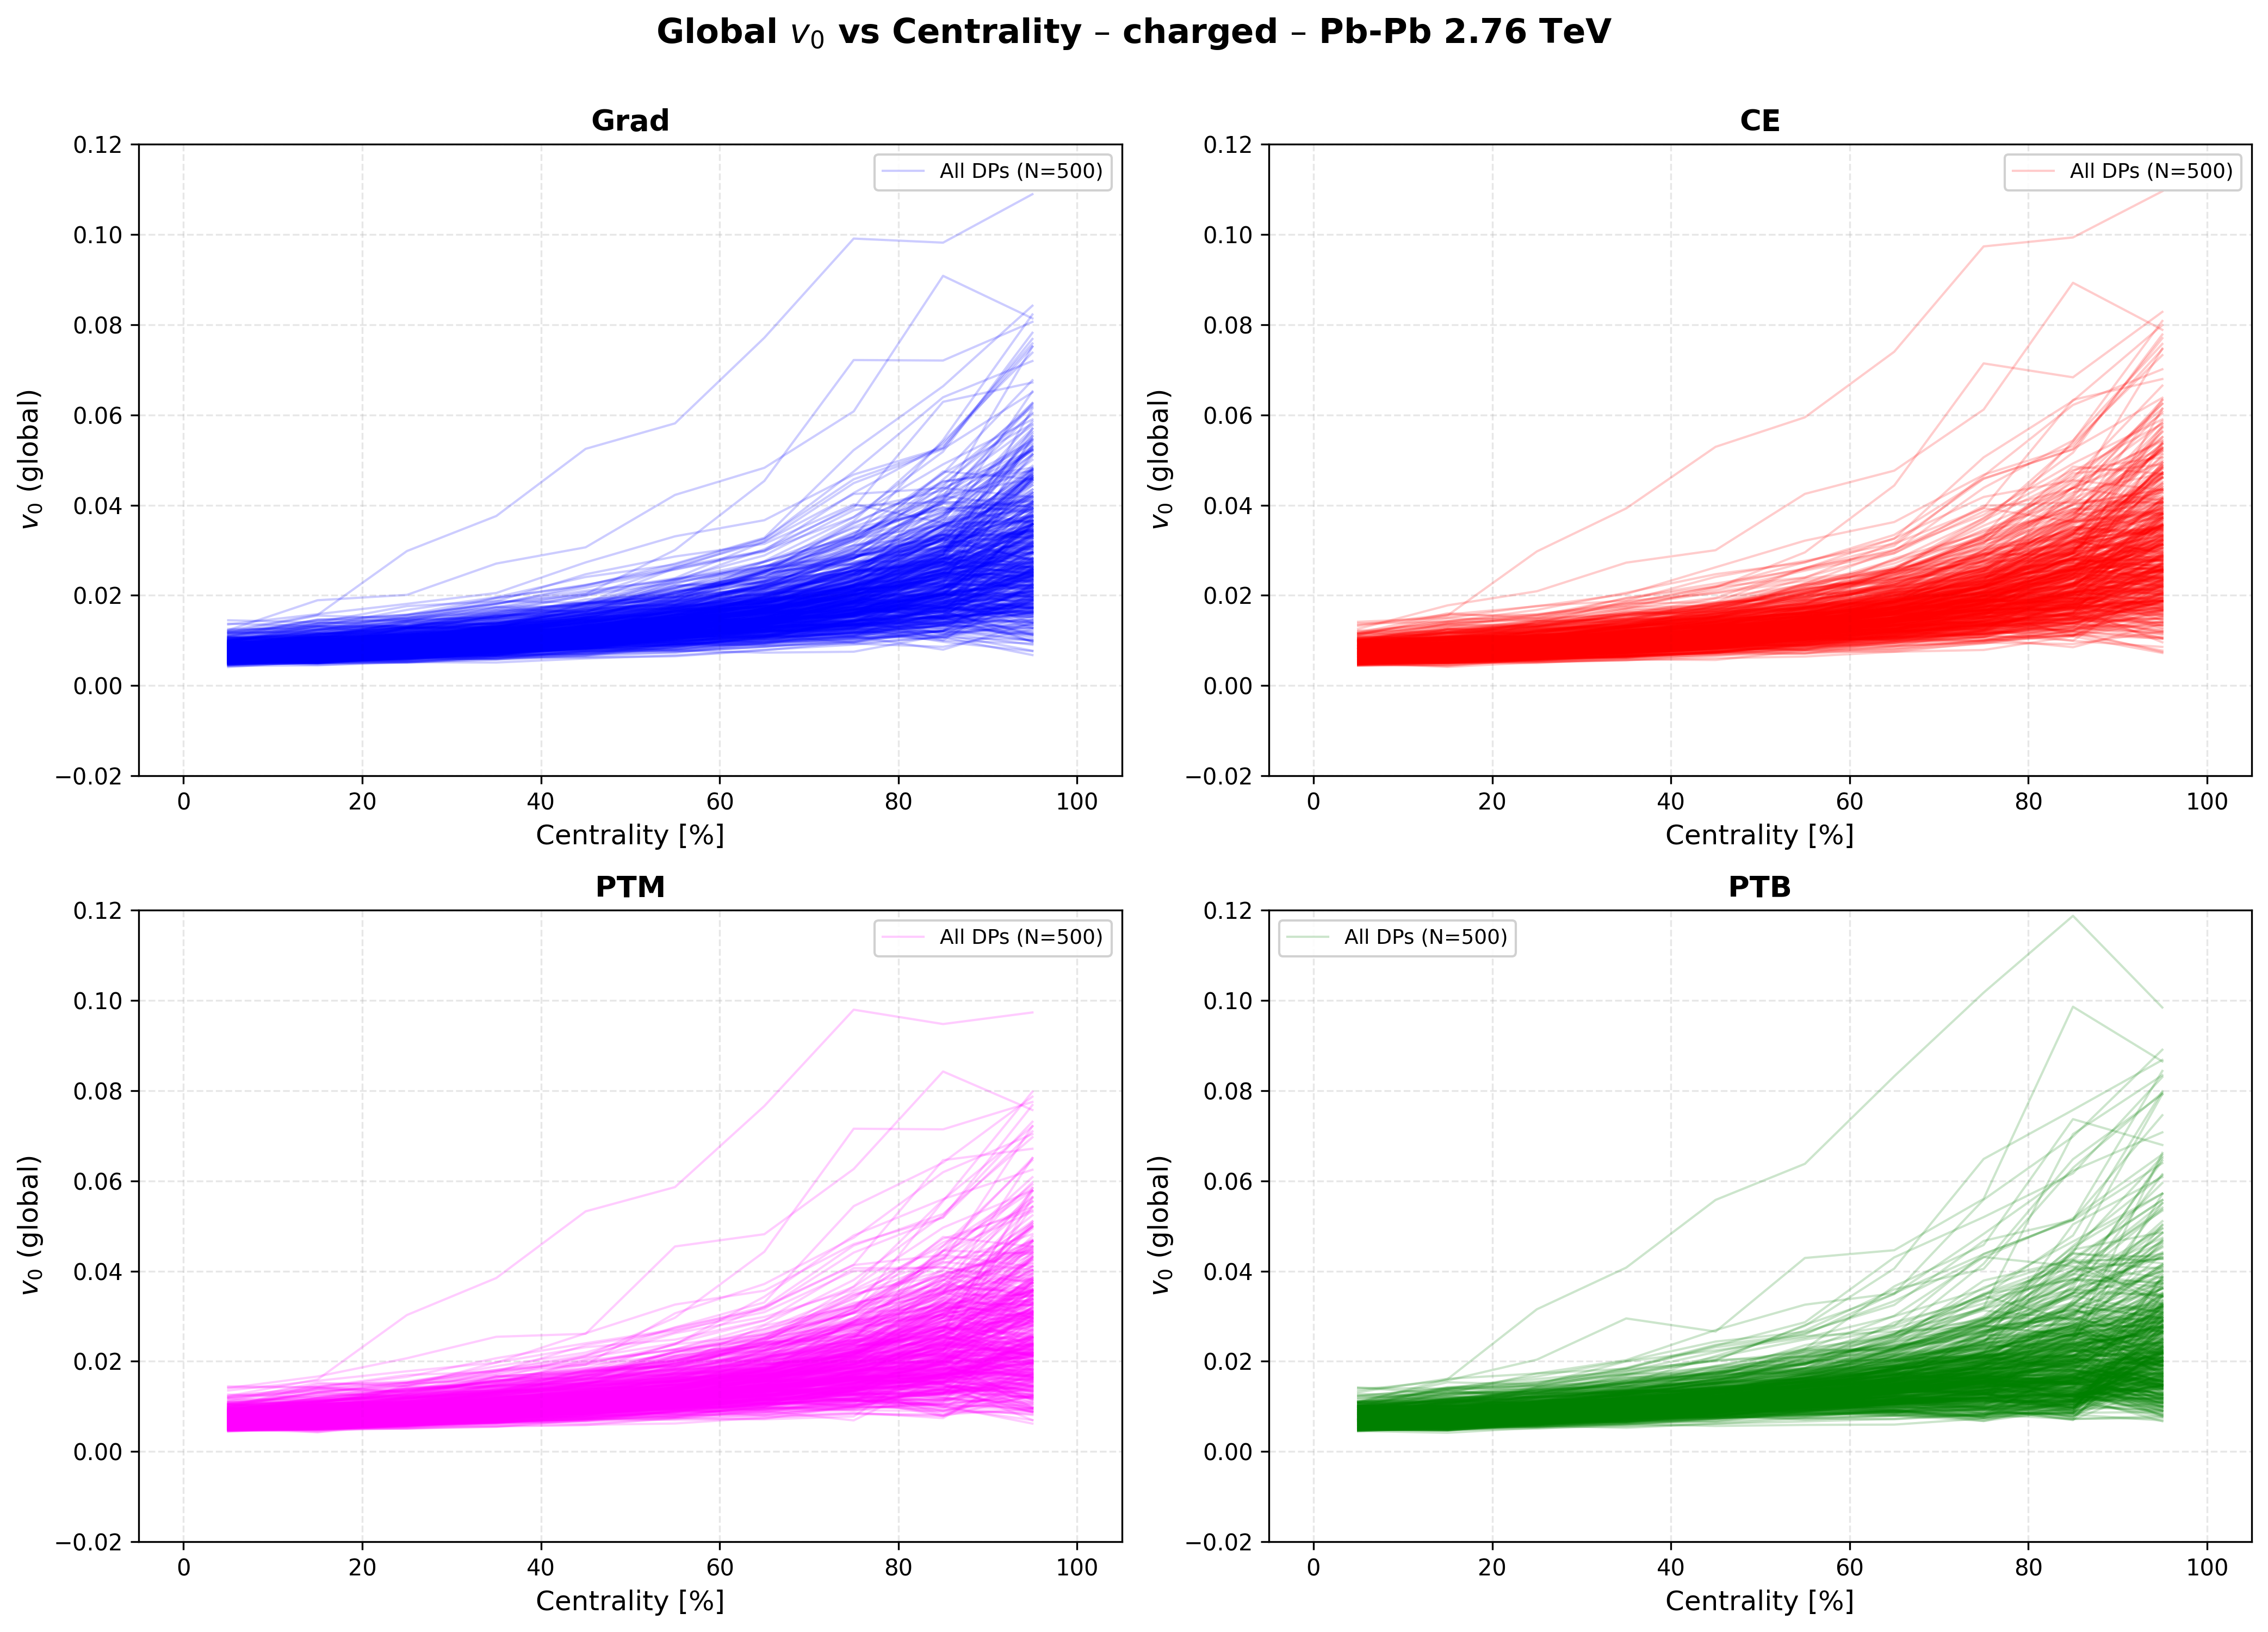


Done!


In [7]:
# =============================================================================
# CONFIGURATION
# =============================================================================

# Input files for different viscous corrections
VISCOUS_CORRECTIONS = {
    'Grad': {
        'file': 'design_points_data/differential_radial_flow/v0pt_design_points_results_Pb_Pb_2760_Grad.pkl',
        'label': 'Grad',
        'color': 'blue'
    },
    'CE': {
        'file': 'design_points_data/differential_radial_flow/v0pt_design_points_results_Pb_Pb_2760_CE.pkl',
        'label': 'CE',
        'color': 'red'
    },
    'PTM': {
        'file': 'design_points_data/differential_radial_flow/v0pt_design_points_results_Pb_Pb_2760_PTM.pkl',
        'label': 'PTM',
        'color': 'magenta'
    },
    'PTB': {
        'file': 'design_points_data/differential_radial_flow/v0pt_design_points_results_Pb_Pb_2760_PTB.pkl',
        'label': 'PTB',
        'color': 'green'
    }
}

# Species to plot
SPECIES = 'charged'  # Options: 'charged', 'pi', 'kaon', 'proton', 'Sigma', 'Xi'

# Design point to highlight (use None to show all equally)
DESIGN_POINT_INDEX = None

# =============================================================================
# LOAD DATA
# =============================================================================

def load_results(filename):
    """Load pickle file with v0(pT) results"""
    if not Path(filename).exists():
        print(f"Warning: File '{filename}' not found!")
        return None
    
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    return results

def extract_v0_vs_centrality(results, species):
    """
    Extract global v0 values for all centralities from design points.
    Returns centrality bins and v0 values for each design point.
    """
    if results is None or len(results) == 0:
        return None
    
    # Get centrality bins from first result
    first_result = results[0]
    cent_indices = sorted(first_result['centrality_data'].keys())
    
    # For each design point, extract v0_global for each centrality
    v0_data = []
    
    for result in results:
        v0_values = []
        v0_errors = []
        
        for cent_idx in cent_indices:
            if cent_idx in result['centrality_data']:
                cent_data = result['centrality_data'][cent_idx]
                if species in cent_data:
                    sp = cent_data[species]
                    v0_values.append(sp['v0_global'])
                    v0_errors.append(sp['v0_global_err'])
                else:
                    v0_values.append(np.nan)
                    v0_errors.append(np.nan)
            else:
                v0_values.append(np.nan)
                v0_errors.append(np.nan)
        
        v0_data.append({
            'design_point': result['design_point'],
            'v0_global': np.array(v0_values),
            'v0_global_err': np.array(v0_errors)
        })
    
    # Create centrality bin centers and labels
    # Assuming centrality bins are 0-5%, 5-10%, etc.
    cent_bins = []
    cent_labels = []
    for idx in cent_indices:
        cent_low = idx * 10
        cent_high = (idx + 1) * 10
        cent_center = (cent_low + cent_high) / 2
        cent_bins.append(cent_center)
        cent_labels.append(f'{cent_low}-{cent_high}%')
    
    return {
        'centrality_bins': np.array(cent_bins),
        'centrality_labels': cent_labels,
        'cent_indices': cent_indices,
        'v0_data': v0_data
    }

# =============================================================================
# PLOTTING FUNCTIONS
# =============================================================================

def plot_v0_vs_centrality_panel(all_data, species_name):
    """
    Create a 2x2 panel figure showing v0 vs centrality for all viscous corrections.
    Each panel shows all design points as faint lines and highlights one.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10), dpi=300)
    axes = axes.flatten()
    
    # Map correction names to subplot positions
    correction_order = ['Grad', 'CE', 'PTM', 'PTB']
    
    for idx, corr_key in enumerate(correction_order):
        if corr_key not in all_data or all_data[corr_key] is None:
            axes[idx].text(0.5, 0.5, f'No data for {corr_key}', 
                          ha='center', va='center', transform=axes[idx].transAxes,
                          fontsize=12, color='red')
            continue
        
        corr_info = VISCOUS_CORRECTIONS[corr_key]
        data = all_data[corr_key]
        color = corr_info['color']
        label = corr_info['label']
        
        cent_bins = data['centrality_bins']
        v0_data_list = data['v0_data']
        
        ax = axes[idx]
        
        # Plot all design points as faint lines
        for dp_data in v0_data_list:
            ax.plot(cent_bins, dp_data['v0_global'], 
                   color=color, alpha=0.2, linewidth=1)
        
        # Highlight selected design point with error bars
        if DESIGN_POINT_INDEX is not None and DESIGN_POINT_INDEX < len(v0_data_list):
            main_dp = v0_data_list[DESIGN_POINT_INDEX]
            ax.errorbar(cent_bins, main_dp['v0_global'], 
                       yerr=main_dp['v0_global_err'],
                       fmt='o-', color=color, markersize=6, capsize=4,
                       linewidth=2, alpha=0.9, 
                       label=f'DP {DESIGN_POINT_INDEX}')
        
        # Add label for all design points
        ax.plot([], [], color=color, alpha=0.2, linewidth=1,
               label=f'All DPs (N={len(v0_data_list)})')
        
        # Axis settings
        ax.set_xlabel('Centrality [%]', fontsize=12)
        ax.set_ylabel(r'$v_0$ (global)', fontsize=12)
        ax.set_title(label, fontsize=13, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.legend(fontsize=9, framealpha=0.9, loc='best')
        ax.tick_params(labelsize=10)
        
        # Set x-axis limits (0-100% centrality)
        ax.set_xlim(-5, 105)
        
        # Set consistent y-axis limits across all panels
        ax.set_ylim(-0.02, 0.12)
    
    # Overall title
    fig.suptitle(f'Global $v_0$ vs Centrality – {species_name} – Pb-Pb 2.76 TeV', 
                 fontsize=15, fontweight='bold', y=0.995)
    
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    return fig

def print_summary(all_data, species_name):
    """Print summary of v0 vs centrality data"""
    print("="*80)
    print("GLOBAL v0 vs CENTRALITY SUMMARY")
    print("="*80)
    print(f"Species: {species_name}")
    
    for corr_key, corr_info in VISCOUS_CORRECTIONS.items():
        print(f"\n--- {corr_info['label']} ---")
        
        if corr_key not in all_data or all_data[corr_key] is None:
            print("  No data available")
            continue
        
        data = all_data[corr_key]
        print(f"  Design points: {len(data['v0_data'])}")
        print(f"  Centrality bins: {len(data['centrality_bins'])}")
        
        if DESIGN_POINT_INDEX is not None and DESIGN_POINT_INDEX < len(data['v0_data']):
            main_dp = data['v0_data'][DESIGN_POINT_INDEX]
            print(f"\n  Highlighted DP {DESIGN_POINT_INDEX}:")
            print(f"  {'Centrality':>12s} {'v0_global':>12s} {'error':>12s}")
            print("  " + "-"*40)
            
            for i, (cent, v0, err) in enumerate(zip(data['centrality_bins'], 
                                                      main_dp['v0_global'],
                                                      main_dp['v0_global_err'])):
                cent_label = data['centrality_labels'][i]
                print(f"  {cent_label:>12s} {v0:12.6f} {err:12.6f}")
    
    print("\n" + "="*80)

# =============================================================================
# MAIN EXECUTION
# =============================================================================

if __name__ == "__main__":
    print("Loading data for all viscous corrections...")
    print("-"*80)
    
    # Load all data
    all_data = {}
    for corr_key, corr_info in VISCOUS_CORRECTIONS.items():
        print(f"Loading {corr_info['label']}...")
        results = load_results(corr_info['file'])
        
        if results is not None:
            data = extract_v0_vs_centrality(results, SPECIES)
            all_data[corr_key] = data
            print(f"  ✓ Loaded {len(results)} design points")
        else:
            all_data[corr_key] = None
            print(f"  ✗ Failed to load")
    
    print("-"*80)
    
    if len(all_data) == 0:
        print("\nError: No data files could be loaded!")
        exit(1)
    
    # Print summary
    print_summary(all_data, SPECIES)
    
    # Create panel plot (2x2)
    print("\nGenerating 2x2 panel plot...")
    fig_panel = plot_v0_vs_centrality_panel(all_data, SPECIES)
    
#    output_filename_panel = f'v0_vs_centrality_panel_{SPECIES}.png'
#    plt.savefig(output_filename_panel, dpi=300, bbox_inches='tight')
#    print(f"Panel plot saved to: {output_filename_panel}")
            
    plt.show()
    
    print("\nDone!")